# Notes

This notebook is based on Paper_Plots_IF_vs_DM.ipynb and Paper_Plots_IF_vs_DM_2.ipynb. It turns the single-redshift plots created in each version of IF_vs_DM_2 into a single, multi-subplot version suitable for the paper.

# Imports

In [1]:
import os
import numpy as np
import illustris_python as il
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.cosmology import Planck15 as cosmosource
from astropy import constants as c
from astropy import units as u
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.ticker as ticker

# Begin

In [2]:
#choose simulation to process
sim_to_process = 'TNG300-1'

#simulation data path
basePath = '/virgotng/universe/IllustrisTNG/{0}/output/'.format(sim_to_process)


In [3]:
#choose snapshots to plot
snap_numbers = [99,84,67,50,40,33,25,21,17]

number of traversals at z = 0.00: 7809
number of traversals at z = 0.20: 8285
number of traversals at z = 0.50: 9292
number of traversals at z = 1.00: 10474
number of traversals at z = 1.50: 12040
number of traversals at z = 2.00: 13397
number of traversals at z = 3.01: 14454
number of traversals at z = 4.01: 14363
number of traversals at z = 5.00: 14369


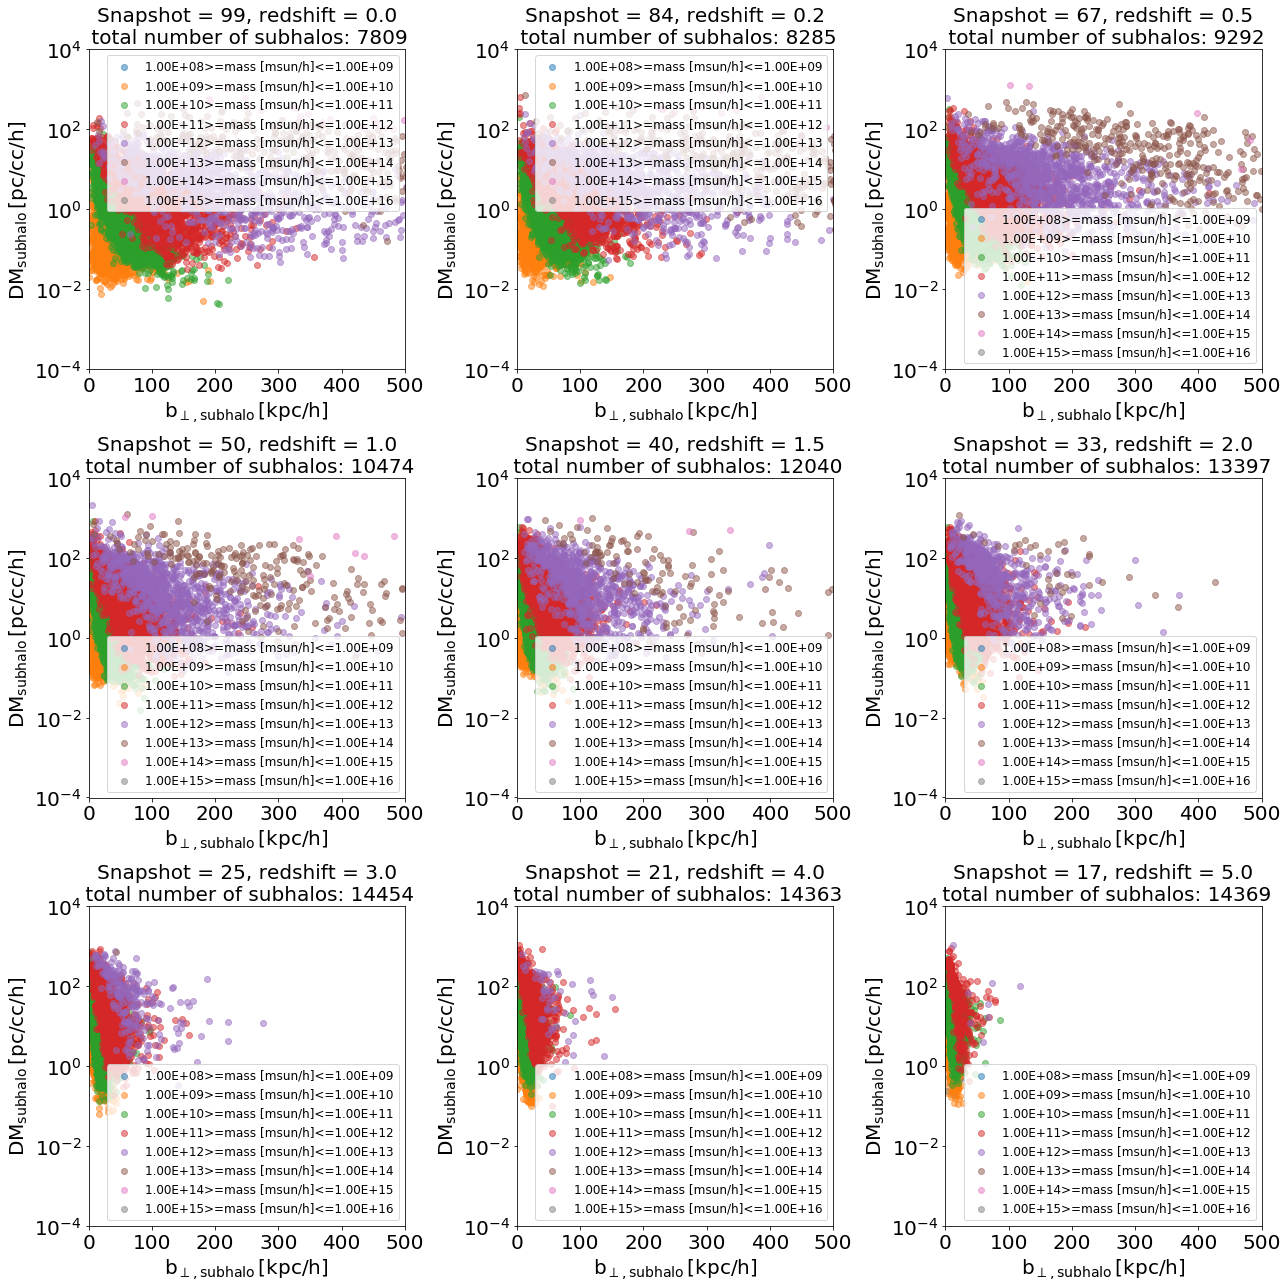

In [4]:
#loop over each snapshot, load data and plot

fig = plt.figure(figsize=(18,18))

for i in range(len(snap_numbers)):
    
    #################################
    #get the current snapshot number#
    #################################
    snap_number = snap_numbers[i]
    
    ###################################
    #get the redshift of this snapshot#
    ###################################
    header = il.groupcat.loadHeader(basePath,snap_number) #get header for this snapshot
    redshift=header['Redshift'] #get redshift of snapshot
    
    #########################################################################################################
    #load relevant snapshot data (shIDs, DMs [physical] [pc/cc/h], IFs [physical] [kpc/h]), masses [10^10Msun/h]#
    #########################################################################################################

    sh_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_Masses = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_Mass_sh.npy'.format(snap_number),allow_pickle=True)

    ############################################################
    #get number of subhalos traversed by pipes at this snapshot#
    ############################################################
    
    n_traversals = len(sh_IDs)
    print('number of traversals at z = {0:.2f}: {1}'.format(redshift,n_traversals))
    
    ##################################################################
    #create masks to group the traversed subhalo data by subhalo mass#
    ##################################################################
    
    masklist = [] #initialise array to hold masks
    boundslist = [] #initialise array to hold min, max bounds for that mask (for plotting)
    massrangebounds = np.array([1.*10**(i) for i in np.arange(-2.,7.)]) #[1e0,1e1,1e2,etc]
    
    #turn these bounds into masks for the full dataset
    for j in range(len(massrangebounds)-1):
        
        #get the lower and upper bound for this data mask
        min_bound = massrangebounds[j]
        max_bound = massrangebounds[j+1]
        boundslist.append([min_bound,max_bound]) #append to array
        #print('min bound: {0:.2E}, max bound {1:.2E}'.format(min_bound,max_bound))

        #create the data mask
        mask = (sh_Masses>=min_bound) & (sh_Masses<=max_bound)
        masklist.append(mask) #append to array
        
    ax=fig.add_subplot(3,3,i+1)

    #ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlim([1e-1,1e7])
    ax.set_xlim([0,500])

    ax.set_ylim([1e-4,1e4])
    ax.set_xlabel(r'$\rm{b_{\perp,subhalo}\,[kpc/h]}$',fontsize=20)
    ax.set_ylabel(r'$\rm{DM_{subhalo}\,[pc/cc/h]}$',fontsize=20)
    ax.set_title('Snapshot = {0}, redshift = {1:.1f}\n total number of subhalos: {2}'.format(snap_number,
                                                                                             redshift,
                                                                                             len(sh_IFs)),fontsize=20)
    ax.tick_params(axis='both',which='major',labelsize=20)
    

    ######################################
    #loop over masks to separate out data#
    ######################################
    
    for j in range(len(masklist)):

        #get the relevant IF, DM data for this mask
        my_mask = masklist[j]
        x = sh_IFs[my_mask]
        y = sh_DMs[my_mask]

        #get the relevant upper and lower mass bounds
        my_bounds = boundslist[j]
        a = my_bounds[0] #lower bound
        b = my_bounds[1] #upper bound

        ax.scatter(x,y,alpha=0.5,label='{0:.2E}>=mass [msun/h]<={1:.2E}'.format(a*1e10,b*1e10))

    ax.legend(fontsize=12)

plt.tight_layout()
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.


number of traversals at z = 0.00: 7809
number of traversals at z = 0.20: 8285


No handles with labels found to put in legend.
No handles with labels found to put in legend.


number of traversals at z = 0.50: 9292
number of traversals at z = 1.00: 10474


No handles with labels found to put in legend.
No handles with labels found to put in legend.


number of traversals at z = 1.50: 12040
number of traversals at z = 2.00: 13397


No handles with labels found to put in legend.


number of traversals at z = 3.01: 14454
number of traversals at z = 4.01: 14363


No handles with labels found to put in legend.
No handles with labels found to put in legend.


number of traversals at z = 5.00: 14369


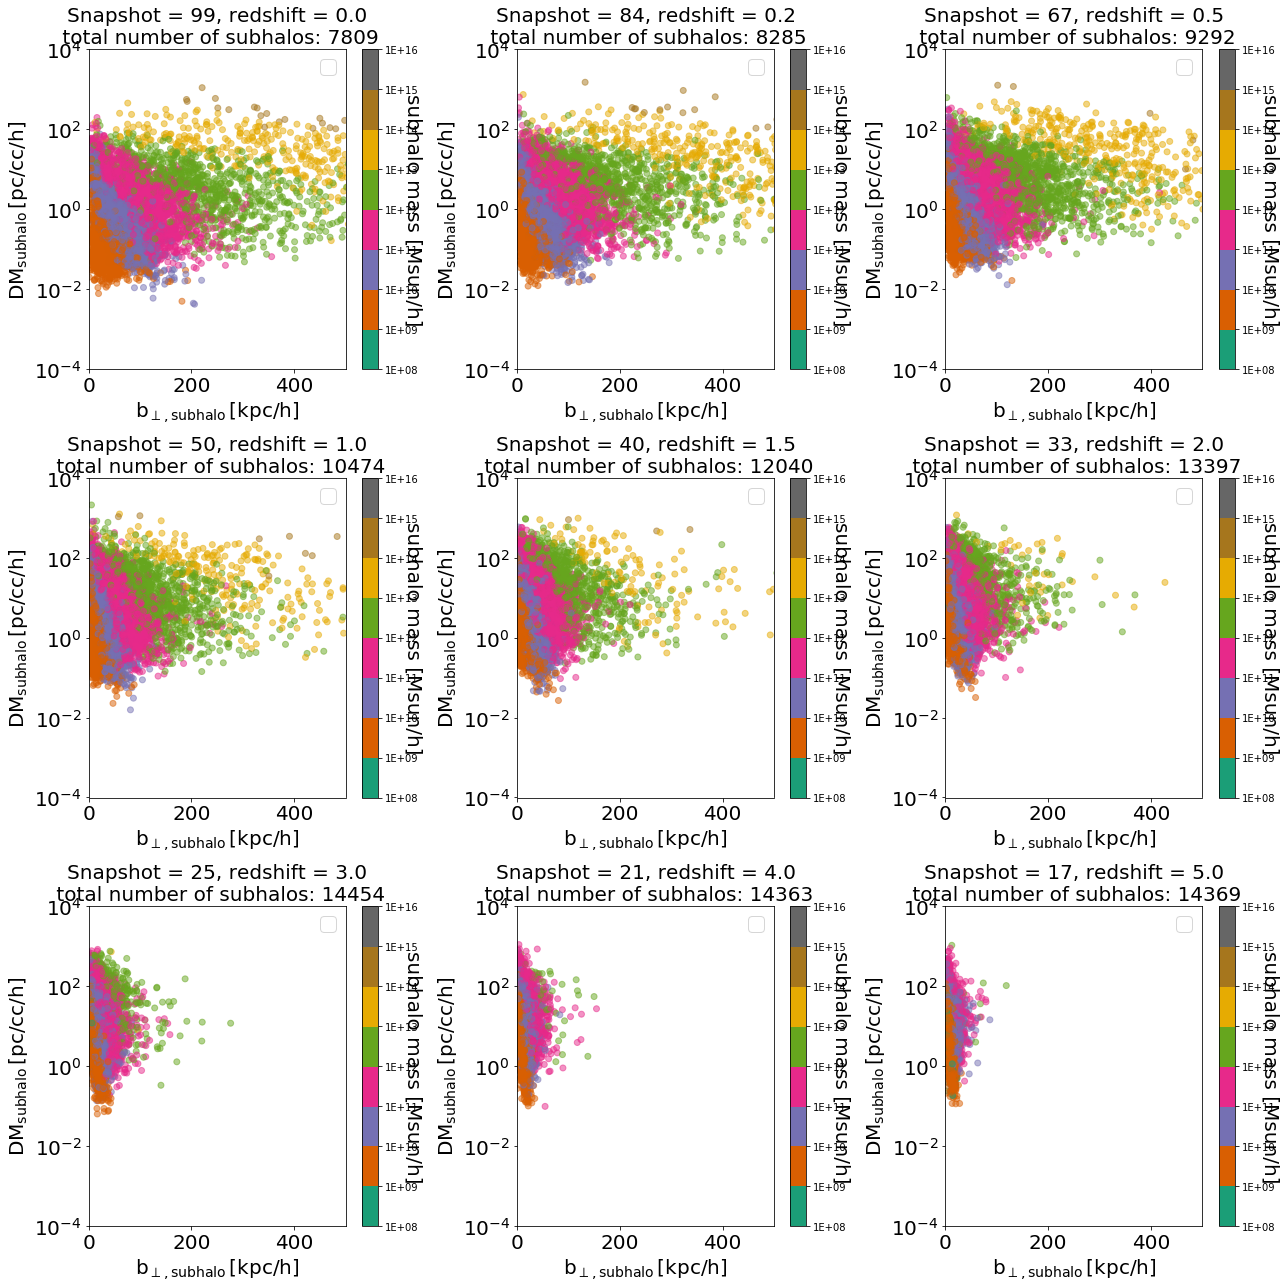

In [5]:
#loop over each snapshot, load data and plot

fig = plt.figure(figsize=(18,18))

for i in range(len(snap_numbers)):
    
    #################################
    #get the current snapshot number#
    #################################
    snap_number = snap_numbers[i]
    
    ###################################
    #get the redshift of this snapshot#
    ###################################
    header = il.groupcat.loadHeader(basePath,snap_number) #get header for this snapshot
    redshift=header['Redshift'] #get redshift of snapshot
    
    #########################################################################################################
    #load relevant snapshot data (shIDs, DMs [physical] [pc/cc], IFs [physical] [kpc]), masses [10^10Msun/h]#
    #########################################################################################################

    sh_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_Masses = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_Mass_sh.npy'.format(snap_number),allow_pickle=True)

    ############################################################
    #get number of subhalos traversed by pipes at this snapshot#
    ############################################################
    
    n_traversals = len(sh_IDs)
    print('number of traversals at z = {0:.2f}: {1}'.format(redshift,n_traversals))
    
    
    ###########
    #plot data#
    ###########
        
        
    #####################
    #initialise the plot#
    #####################
    
    ax=fig.add_subplot(3,3,i+1)

    #ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlim([1e-1,1e7])
    ax.set_xlim([0,500])

    ax.set_ylim([1e-4,1e4])
    ax.set_xlabel(r'$\rm{b_{\perp,subhalo}\,[kpc/h]}$',fontsize=20)
    ax.set_ylabel(r'$\rm{DM_{subhalo}\,[pc/cc/h]}$',fontsize=20)
    ax.set_title('Snapshot = {0}, redshift = {1:.1f}\n total number of subhalos: {2}'.format(snap_number,
                                                                                             redshift,
                                                                                             len(sh_IFs)),fontsize=20)
    ax.tick_params(axis='both',which='major',labelsize=20)
    


    ##############
    #data to plot#
    ##############
    x = sh_IFs
    y = sh_DMs

    
    ############################
    #create the custom colormap#
    ############################
    cmap = plt.cm.Dark2  # define the colormap style
    cmaplist = [cmap(i) for i in range(cmap.N)] # extract all colors from the map
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap',
                                                        cmaplist, cmap.N) # create new custom map
    
    #define the bin boundaries based on masses in code units [= 1e10Msun/h]
    massrangebounds = np.array([1.*10**(i) for i in np.arange(-2.,7.)]) #i.e. [1e-2,1e-1,1e0,...]*1e10 Msun/h
    
    #convert bin boundaries from code units to units of Msun/h
    bounds = massrangebounds*1e10 #i.e. [1e8,1e9,1e10,...] Msun/h
    
    #normalize
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    ##############################################################################
    #plot data based on their masses in units of Msun/h and the custom colour map#
    ##############################################################################
    ax.scatter(x,y,alpha=0.5,c=sh_Masses*1e10,cmap=cmap,norm=norm)
    
    ########################################
    # create a second axes for the colorbar#
    ########################################
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar=plt.colorbar(sm, ticks=bounds,
                 boundaries=bounds,format='%1.E')
    cbar.set_label('subhalo mass [Msun/h]', rotation=270,fontsize=20)
    

    ax.legend(fontsize=20)

plt.tight_layout()

# Create a paper-worthy version of this plot


number of traversals at z = 0.00: 7809
0
True
number of traversals at z = 0.20: 8285
1
True
number of traversals at z = 0.50: 9292
2
True
number of traversals at z = 1.00: 10474
3
number of traversals at z = 1.50: 12040
4
number of traversals at z = 2.00: 13397
5
number of traversals at z = 3.01: 14454
6
number of traversals at z = 4.01: 14363
7
number of traversals at z = 5.00: 14369
8


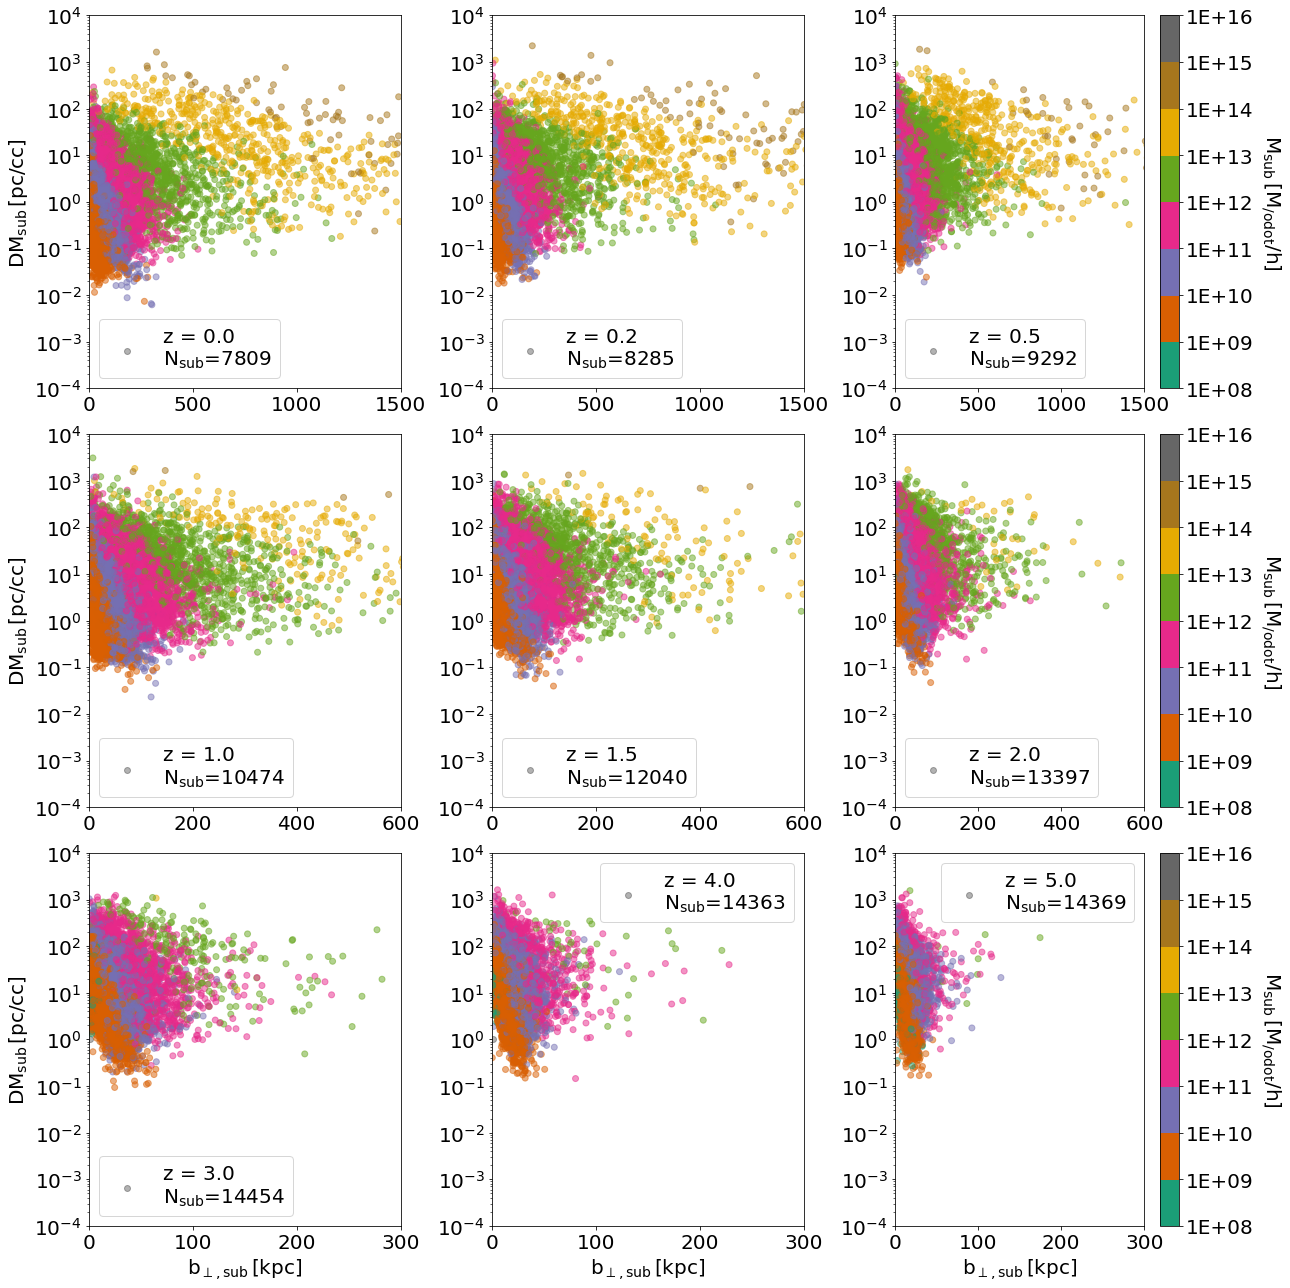

In [6]:
#loop over each snapshot, load data and plot

fig = plt.figure(figsize=(18,18))

for i in range(len(snap_numbers)):
    
    #################################
    #get the current snapshot number#
    #################################
    snap_number = snap_numbers[i]
    
    ###################################
    #get the redshift of this snapshot#
    ###################################
    header = il.groupcat.loadHeader(basePath,snap_number) #get header for this snapshot
    redshift=header['Redshift'] #get redshift of snapshot
    
    #########################################################################################################
    #load relevant snapshot data (shIDs, DMs [physical] [pc/cc], IFs [physical] [kpc]), masses [10^10Msun/h]#
    #########################################################################################################

    sh_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_Masses = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_Mass_sh.npy'.format(snap_number),allow_pickle=True)

    ############################################################
    #get number of subhalos traversed by pipes at this snapshot#
    ############################################################
    
    n_traversals = len(sh_IDs)
    print('number of traversals at z = {0:.2f}: {1}'.format(redshift,n_traversals))
    
    
    ###########
    #plot data#
    ###########
        
        
    #####################
    #initialise the plot#
    #####################
    
    ax=fig.add_subplot(3,3,i+1)

    #ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlim([1e-1,1e7]
    
    #set the x limits for each row of plots
    print(i)
    if i in np.array([0,1,2]):
        print(True)
        ax.set_xlim([0,1500])
    elif i in np.array([3,4,5]):
        ax.set_xlim([0,600])
    else:
        ax.set_xlim([0,300])

    ax.set_ylim([1e-4,1e4])
    
    if i in [6,7,8]: #only include x axis on bottom plots
        ax.set_xlabel(r'$\rm{b_{\perp,sub}\,[kpc]}$',fontsize=20)
    
    if i in [0,3,6]: #only include y axis on left-hand plots
        ax.set_ylabel(r'$\rm{DM_{sub}\,[pc/cc]}$',fontsize=20)
    ax.tick_params(axis='both',which='major',labelsize=20)
    


    ##############
    #data to plot#
    ##############
    x = sh_IFs/cosmosource.h #convert to [kpc] from [kpc/h]
    y = sh_DMs/cosmosource.h #convert to [pc/cc] from [pc/cc/h]

    
    ############################
    #create the custom colormap#
    ############################
    cmap = plt.cm.Dark2  # define the colormap style
    cmaplist = [cmap(i) for i in range(cmap.N)] # extract all colors from the map
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap',
                                                        cmaplist, cmap.N) # create new custom map
    
    #define the bin boundaries based on masses in code units [= 1e10Msun/h]
    massrangebounds = np.array([1.*10**(i) for i in np.arange(-2.,7.)]) #i.e. [1e-2,1e-1,1e0,...]*1e10 Msun/h
    
    #convert bin boundaries from code units to units of Msun/h
    bounds = massrangebounds*1e10 #i.e. [1e8,1e9,1e10,...] Msun/h
    
    #normalize
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    ###############################################
    #set up a scatter label to include useful info#
    ###############################################
    scatterlabel = 'z = {0:.1f}\n'.format(redshift)+r'${\rm N_{sub}}$='+'{0}'.format(len(sh_IFs))
    ax.scatter([1],[1],alpha=0.3,color='k',label=scatterlabel)
    
    ##############################################################################
    #plot data based on their masses in units of Msun/h and the custom colour map#
    ##############################################################################
    ax.scatter(x,y,alpha=0.5,c=sh_Masses*1e10,cmap=cmap,norm=norm)
    

    
    if i in [2,5,8]: #only include the colourbar axes on the right-hand plots
        
        ########################################
        # create a second axes for the colorbar#
        ########################################
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar=plt.colorbar(sm, ticks=bounds,
                     boundaries=bounds,format='%1.E')
        cbar.set_label(r'${\rm M_{sub}\,[M_{/odot}/h]}$', rotation=270,fontsize=20,labelpad=30)
        cbar.ax.tick_params(labelsize=20) 

    ax.legend(fontsize=20)

plt.tight_layout()

number of traversals at z = 0.00: 7809
0
True
number of traversals at z = 0.20: 8285
1
True
number of traversals at z = 0.50: 9292
2
True
number of traversals at z = 1.00: 10474
3
number of traversals at z = 1.50: 12040
4
number of traversals at z = 2.00: 13397
5
number of traversals at z = 3.01: 14454
6
number of traversals at z = 4.01: 14363
7
number of traversals at z = 5.00: 14369
8


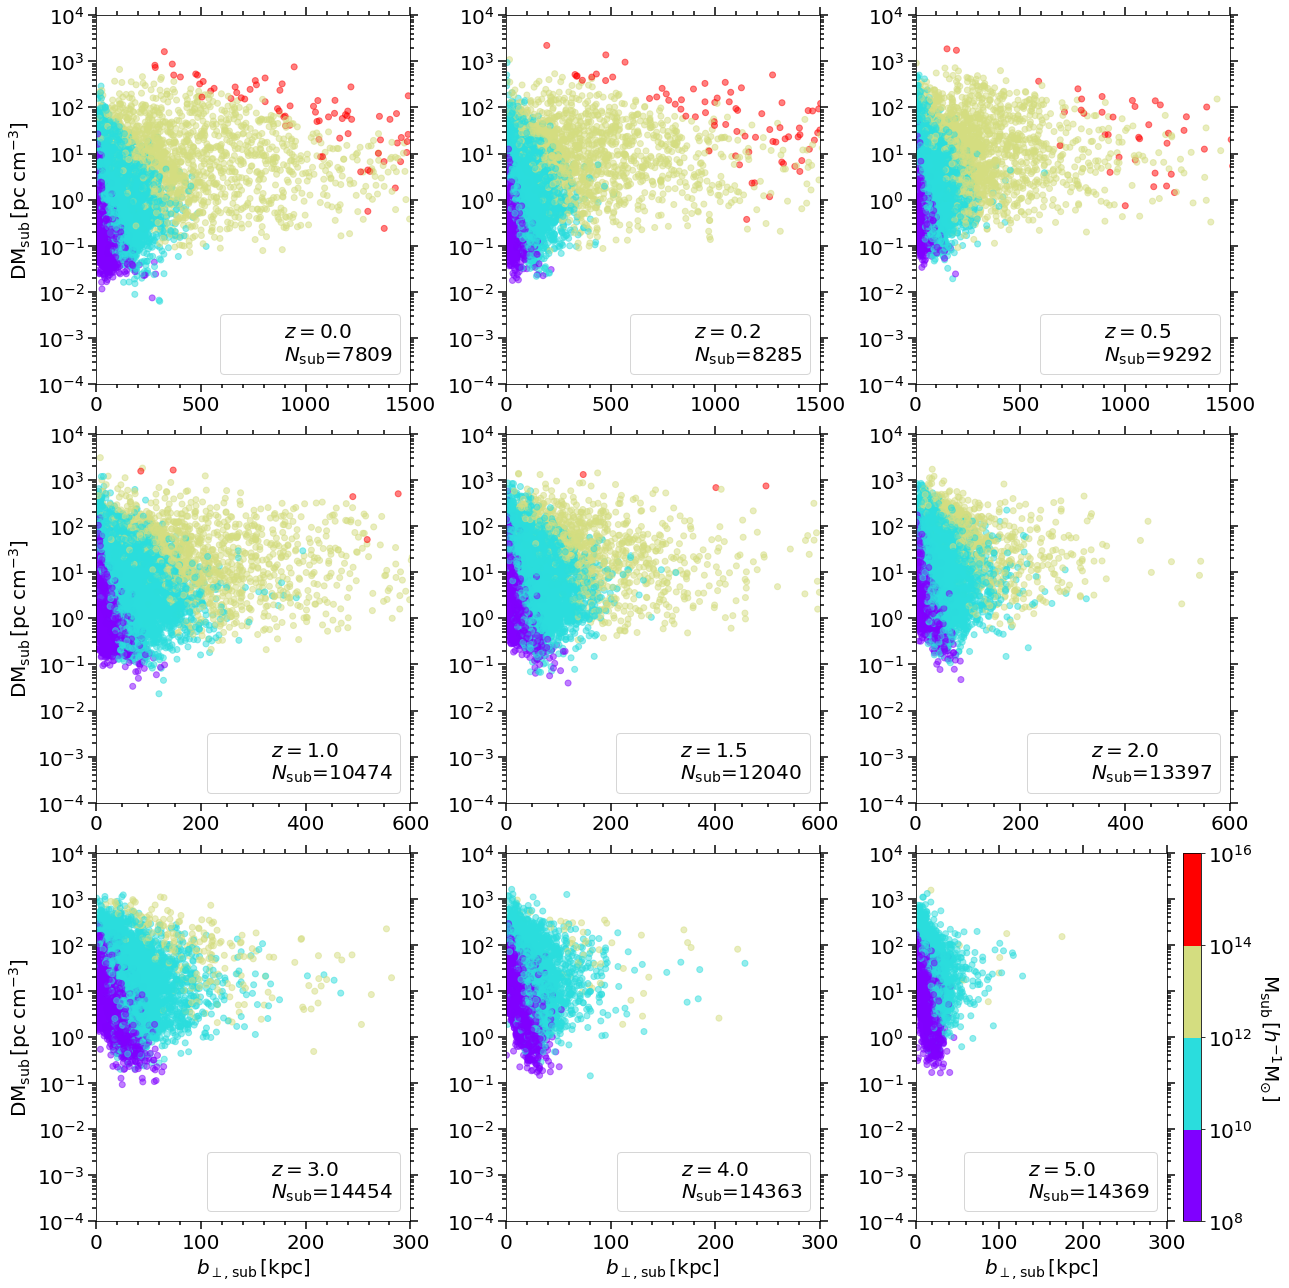

In [29]:
#loop over each snapshot, load data and plot

fig = plt.figure(figsize=(18,18))

for i in range(len(snap_numbers)):
    
    #################################
    #get the current snapshot number#
    #################################
    snap_number = snap_numbers[i]
    
    ###################################
    #get the redshift of this snapshot#
    ###################################
    header = il.groupcat.loadHeader(basePath,snap_number) #get header for this snapshot
    redshift=header['Redshift'] #get redshift of snapshot
    
    #########################################################################################################
    #load relevant snapshot data (shIDs, DMs [physical] [pc/cc], IFs [physical] [kpc]), masses [10^10Msun/h]#
    #########################################################################################################

    sh_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_Masses = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_Mass_sh.npy'.format(snap_number),allow_pickle=True)

    ############################################################
    #get number of subhalos traversed by pipes at this snapshot#
    ############################################################
    
    n_traversals = len(sh_IDs)
    print('number of traversals at z = {0:.2f}: {1}'.format(redshift,n_traversals))
    
    
    ###########
    #plot data#
    ###########
        
        
    #####################
    #initialise the plot#
    #####################
    
    ax=fig.add_subplot(3,3,i+1)

    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis='x', width=1.5, length=8, which='major',labelsize=20)
    ax.tick_params(axis='y', width=1.5, length=8, which='major',labelsize=20)
    ax.tick_params(axis='x', width=1.5, length=4, which='minor',labelsize=20)
    ax.tick_params(axis='y', width=1.5, length=4, which='minor',labelsize=20)
    ax.xaxis.get_ticklocs(minor=True)
    ax.minorticks_on()
    #ax.set_xlim([1e-1,1e7]
    
    #set the x limits for each row of plots
    print(i)
    if i in np.array([0,1,2]):
        print(True)
        ax.set_xlim([0,1500])
    elif i in np.array([3,4,5]):
        ax.set_xlim([0,600])
    else:
        ax.set_xlim([0,300])

    ax.set_ylim([1e-4,1e4])
    
    if i in [6,7,8]: #only include x axis on bottom plots
        ax.set_xlabel(r'$b_{\perp,{\rm sub}}\,{\rm [kpc]}$',fontsize=20)
    
    if i in [0,3,6]: #only include y axis on left-hand plots
        ax.set_ylabel(r'$\rm{DM_{sub}\,[pc\;cm^{-3}]}$',fontsize=20)
    ax.tick_params(axis='both',which='major',labelsize=20)
    


    ##############
    #data to plot#
    ##############
    x = sh_IFs/cosmosource.h #convert to [kpc] from [kpc/h]
    y = sh_DMs/cosmosource.h #convert to [pc/cc] from [pc/cc/h]

    
    ############################
    #create the custom colormap#
    ############################
    cmap = plt.cm.rainbow #plt.cm.Dark2  # define the colormap style
    cmaplist = [cmap(i) for i in range(cmap.N)] # extract all colors from the map
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap',
                                                        cmaplist, cmap.N) # create new custom map
    
    #define the bin boundaries based on masses in code units [= 1e10Msun/h]
    massrangebounds = np.array([1.*10**(i) for i in np.arange(-2.,7.)]) #i.e. [1e-2,1e-1,1e0,...]*1e10 Msun/h
    massrangebounds=massrangebounds[::2] #less fine boundaries
    
    #convert bin boundaries from code units to units of Msun/h
    bounds = massrangebounds*1e10 #i.e. [1e8,1e9,1e10,...] Msun/h
    
    #normalize
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    ###############################################
    #set up a scatter label to include useful info#
    ###############################################
    scatterlabel = r'$z = {0:.1f}$'.format(redshift)+'\n'+r'${N_{\rm{sub}}}$='+'{0}'.format(len(sh_IFs))
    ax.scatter([1],[1],alpha=0.,color='k',label=scatterlabel)
    
    ##############################################################################
    #plot data based on their masses in units of Msun/h and the custom colour map#
    ##############################################################################
    ax.scatter(x,y,alpha=0.5,c=sh_Masses*1e10,cmap=cmap,norm=norm)
    

    
    #if i in [2,5,8]: #only include the colourbar axes on the right-hand plots
    if i in [8]: #only include the colourbar axes on the bottom right-hand plots

        ############################################################
        #create function to make colourbar axes scientific notation#
        ############################################################
        #from: https://stackoverflow.com/questions/25983218/scientific-notation-colorbar-in-matplotlib
        def fmt(x, pos):
            a, b = '{:.2e}'.format(x).split('e')
            b = int(b)
            #return r'${} \times 10^{{{}}}$'.format(a, b)
            return r'$10^{{{}}}$'.format(b)
        
        ########################################
        # create a second axes for the colorbar#
        ########################################
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        #old version with computer notation on colorbar ticks
        #cbar=plt.colorbar(sm, ticks=bounds,
        #             boundaries=bounds,format='%1.E')
        #new version with scientific notation on colorbar ticks
        
        
        
        
        cbar=plt.colorbar(sm,ticks=bounds,
                     boundaries=bounds,format=ticker.FuncFormatter(fmt))#,orientation='horizontal')
        cbar.set_label(r'${\rm M_{sub}}\,[h^{-1}{\rm M_{\odot}]}$', rotation=270,fontsize=20,labelpad=30)
        cbar.ax.tick_params(labelsize=20)
        #cbar.ax.set_position([0,0,1,1])

    ax.legend(fontsize=20,loc='lower right')

plt.tight_layout()
plt.savefig('Paper_Plot_IF_vs_DM.png',format='png')

In [9]:
print(1)

1


# Same plot as above, but with better colorbar

number of traversals at z = 0.00: 7809
0
True
number of traversals at z = 0.20: 8285
1
True
number of traversals at z = 0.50: 9292
2
True
number of traversals at z = 1.00: 10474
3
number of traversals at z = 1.50: 12040
4
number of traversals at z = 2.00: 13397
5
number of traversals at z = 3.01: 14454
6
number of traversals at z = 4.01: 14363
7
number of traversals at z = 5.00: 14369
8


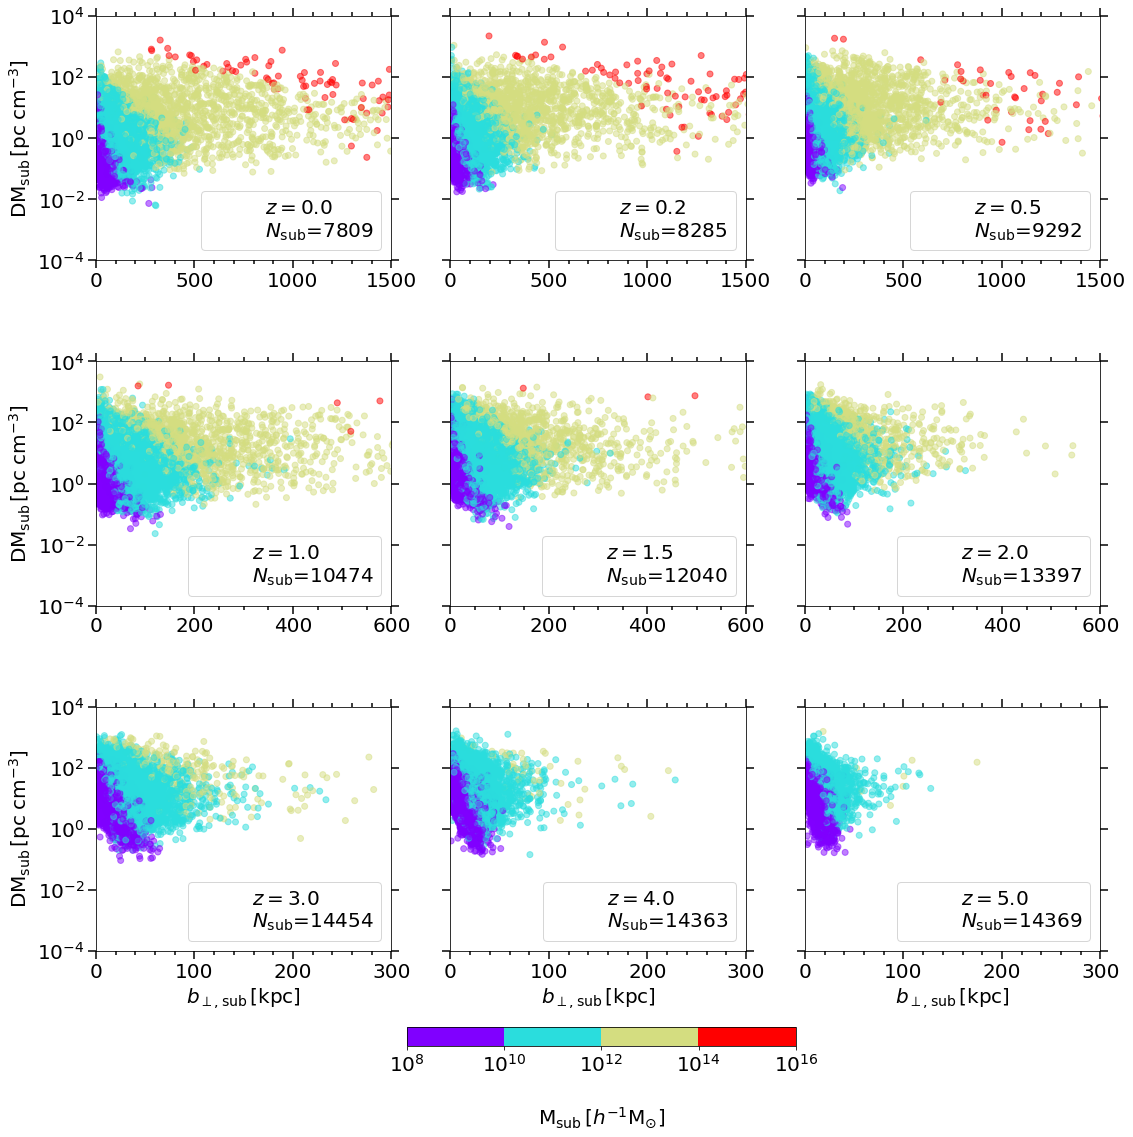

In [86]:
#loop over each snapshot, load data and plot
from mpl_toolkits.axes_grid1 import make_axes_locatable as mal

fig = plt.figure(figsize=(18,18))

for i in range(len(snap_numbers)):
    
    #################################
    #get the current snapshot number#
    #################################
    snap_number = snap_numbers[i]
    
    ###################################
    #get the redshift of this snapshot#
    ###################################
    header = il.groupcat.loadHeader(basePath,snap_number) #get header for this snapshot
    redshift=header['Redshift'] #get redshift of snapshot
    
    #########################################################################################################
    #load relevant snapshot data (shIDs, DMs [physical] [pc/cc], IFs [physical] [kpc]), masses [10^10Msun/h]#
    #########################################################################################################

    sh_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_Masses = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_Mass_sh.npy'.format(snap_number),allow_pickle=True)

    ############################################################
    #get number of subhalos traversed by pipes at this snapshot#
    ############################################################
    
    n_traversals = len(sh_IDs)
    print('number of traversals at z = {0:.2f}: {1}'.format(redshift,n_traversals))
    
    
    ###########
    #plot data#
    ###########
        
        
    #####################
    #initialise the plot#
    #####################
    
    ax=fig.add_subplot(3,3,i+1)

    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis='x', width=1.5, length=8, which='major',labelsize=20)
    ax.tick_params(axis='y', width=1.5, length=8, which='major',labelsize=20)
    ax.tick_params(axis='x', width=1.5, length=4, which='minor',labelsize=20)
    ax.tick_params(axis='y', width=1.5, length=4, which='minor',labelsize=20)
    ax.xaxis.get_ticklocs(minor=True)

    ax.minorticks_on()
    #ax.set_xlim([1e-1,1e7]
    
    #set the x limits for each row of plots
    print(i)
    if i in np.array([0,1,2]):
        print(True)
        ax.set_xlim([0,1500])
    elif i in np.array([3,4,5]):
        ax.set_xlim([0,600])
    else:
        ax.set_xlim([0,300])

    ax.set_ylim([1e-4,1e4])
    
    if i in [6,7,8]: #only include x axis on bottom plots
        ax.set_xlabel(r'$b_{\perp,{\rm sub}}\,{\rm [kpc]}$',fontsize=20)
    
    if i in [0,3,6]: #only include y axis on left-hand plots
        ax.set_ylabel(r'$\rm{DM_{sub}\,[pc\;cm^{-3}]}$',fontsize=20)
        #ax.tick_params(axis='y', which='minor', bottom=True)    
    else:
        ax.yaxis.set_tick_params(labelleft=False)
    ax.tick_params(axis='both',which='major',labelsize=20)
    
    


    ##############
    #data to plot#
    ##############
    x = sh_IFs/cosmosource.h #convert to [kpc] from [kpc/h]
    y = sh_DMs/cosmosource.h #convert to [pc/cc] from [pc/cc/h]

    
    ############################
    #create the custom colormap#
    ############################
    cmap = plt.cm.rainbow #plt.cm.Dark2  # define the colormap style
    cmaplist = [cmap(i) for i in range(cmap.N)] # extract all colors from the map
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap',
                                                        cmaplist, cmap.N) # create new custom map
    
    #define the bin boundaries based on masses in code units [= 1e10Msun/h]
    massrangebounds = np.array([1.*10**(i) for i in np.arange(-2.,7.)]) #i.e. [1e-2,1e-1,1e0,...]*1e10 Msun/h
    massrangebounds=massrangebounds[::2] #less fine boundaries
    
    #convert bin boundaries from code units to units of Msun/h
    bounds = massrangebounds*1e10 #i.e. [1e8,1e9,1e10,...] Msun/h
    
    #normalize
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    ###############################################
    #set up a scatter label to include useful info#
    ###############################################
    scatterlabel = r'$z = {0:.1f}$'.format(redshift)+'\n'+r'${N_{\rm{sub}}}$='+'{0}'.format(len(sh_IFs))
    ax.scatter([1],[1],alpha=0.,color='k',label=scatterlabel)
    
    ##############################################################################
    #plot data based on their masses in units of Msun/h and the custom colour map#
    ##############################################################################
    ax.scatter(x,y,alpha=0.5,c=sh_Masses*1e10,cmap=cmap,norm=norm)
    

    
    #if i in [2,5,8]: #only include the colourbar axes on the right-hand plots
    if i in [8]: #only include the colourbar axes on the bottom right-hand plots

        ############################################################
        #create function to make colourbar axes scientific notation#
        ############################################################
        #from: https://stackoverflow.com/questions/25983218/scientific-notation-colorbar-in-matplotlib
        def fmt(x, pos):
            a, b = '{:.2e}'.format(x).split('e')
            b = int(b)
            #return r'${} \times 10^{{{}}}$'.format(a, b)
            return r'$10^{{{}}}$'.format(b)
        
        ########################################
        # create a second axes for the colorbar#
        ########################################
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        #old version with computer notation on colorbar ticks
        #cbar=plt.colorbar(sm, ticks=bounds,
        #             boundaries=bounds,format='%1.E')
        #new version with scientific notation on colorbar ticks
        
        
        #divider tip stops colorbar squashing the last plot:
        #from https://stackoverflow.com/questions/42396927/how-to-adjust-size-of-two-subplots-one-with-colorbar-and-another-without-in-py
        divider=mal(ax)
        cax=divider.append_axes('bottom',size='3%',pad=0.5)
        cax.axis('off')
        
        cbar=plt.colorbar(sm,ticks=bounds,
                     boundaries=bounds,format=ticker.FuncFormatter(fmt),orientation='horizontal')
        cbar.set_label(r'${\rm M_{sub}}\,[h^{-1}{\rm M_{\odot}]}$', rotation=0,fontsize=20,labelpad=30)
        cbar.ax.tick_params(labelsize=20)
        cbar.ax.set_position([0.365,-0.1,0.3,0.2])
        
    else:
        divider=mal(ax)
        cax=divider.append_axes('bottom',size='3%',pad=0.5)
        cax.axis('off')

    ax.legend(fontsize=20,loc='lower right')

#plt.tight_layout()
plt.savefig('Paper_Plot_IF_vs_DM.png',format='png')